# Loading Dependancies
 **You should restart the runtime before importing the dependancies**
 >> from runtime >> restart runtime.

In [8]:
!sudo apt install  tesseract-ocr
!sudo pip install  pytesseract
!sudo pip install  pillow --upgrade
!sudo apt install  kraken

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 16 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (5,543 kB/s)
debconf: unable to initi

### COLAB TOOLS

In [9]:
from google.colab import files
from IPython.display import display
from google.colab import drive
drive.mount("/content/drive/")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


# MICHIGAN ASSIGNMENT CODE
### OBJECTIVE: 
##### Detect "Chris" in "small_images.zip", "Mark" in "images.zip"


### IMPORTING PYTHON MODULES



In [0]:
import os
import PIL
import cv2 as cv
import numpy as np
import pytesseract as pt
from zipfile import ZipFile, ZipInfo
from PIL import Image, ImageDraw, ImageColor, ImageFont

##  DECLARATIONS

In [0]:
class FaceCrop:
  
  '''This class imports raw img from all supported formats,
     having method to process the image in the suitable style,
     and return the processed img, extending the functionality
     the class supports face detection through located haar file.
     the detected faces can be diplayed with preset image size,
     or cropped using special method cropping all found faces,
     the crope method returns list of PIL.Image objects,
     each having cropped face.'''
  
    
    def __init__(self):

        # Initializing each image attributes
      
        self.img = None
        self.imgName = ""
        self.imgPath = ""
        self.faces = []
        self.boundingBoxes = []


    # using PIL convert it to rgb to cv2
    def import_img(self, path):
        
        '''Takes one parameter, returns raw image object of PIL.Image
           
           path: the local path of the image to import.'''
        
        self.imgName = os.path.basename(path)
        self.imgPath = path
        self.imgName = path.find("/", -1)
        with Image.open(self.imgPath) as img:
            self.img = img.convert("RGB")

            return self.img


    # pre process it using cv2
    def img_process(self, get_edges=False, binarize=False, gray_scale=True, img_format='cv2'):

        '''Preprocess the imported image to prepare it for next analysing processes.
           Accepts multi-Argument initialized with default values, combined modes are accepted.
           it returns the processed image required for next process for ocr detection, 
           with default object numpy 2d-array.
           
           get_edges: extracts the image edges improves for text detection
           binarize: used to improve text detection by reducing the image data
           gray_scale: turns the image into black and white 2D matrix for faster image recognition
           img_format: converts numpy array image to PIL.Image.Image format when set to 'pil' '''
      
        cvImg = np.asarray(self.img)
        processedImg = cvImg

        if gray_scale == True:
            processedImg = cv.cvtColor(processedImg, cv.COLOR_BGR2GRAY)

        if binarize == True:
            processedImg = cv.threshold(processedImg, 179, 170, cv.THRESH_BINARY)[1]

        if get_edges == True:
            processedImg = cv.Canny(processedImg, 100, 300) 

        if img_format == 'pil':
            processedImg = Image.fromarray(processedImg)

        return processedImg


    # face detection using cv2
    def apply_classifier(self, img, th1, th2, haar_path):
        
        '''Applies the given haar classifier to detect objects in image,
           returning nothing but identifies the objects and their coordinates in the image
           
           param img: the preprocessed image object of cv2 numpy 2d-array format
           param th1: scaleFactor of the expected objects detected in the image
           param th2: minNeighbors of the expected objects detected in the image
           param haar_path: locating the haar classifier of choice for object detection'''
        
        haarFile = cv.CascadeClassifier(haar_path)
        self.faces = haarFile.detectMultiScale(img, th1, th2)


    # draw box over detected faces
    def select_faces(self, show_im=True, color='yellow', size=None):
        
        '''Draws bounding boxes of the detected objects in the image,
           and displays the image with boxes when the show_im=True
           
           param show_im: True or False controls displaying the detected objects
           param color: changes the bounding boxes displayed color
           param size: can resize the displayed image, intialized to the original size'''
        
        paintedImg = self.img.copy()
        painter = ImageDraw.Draw(paintedImg)

        for face in self.faces:
            box = [face[0], face[1], face[0]+face[2], face[1]+face[3]]
            painter.rectangle((box), outline=color, width=7)
            self.boundingBoxes.append(box)

        if not size:
            size = self.img.size()

        if show_im == True:
            img = paintedImg.copy()
            img.thumbnail(size)
            display(img)


    # crop detected faces
    def crop_imgs(self):
        
        '''Crops the detected objects from the original image,
           and returns list of cropped objects of type class PIL.Image.Image'''
        
        cropedImgs = [self.img.crop(box) for box in self.boundingBoxes]

        return cropedImgs

    

In [0]:
class FindWord:
  
    '''Accepts image object of type class PIL.Image.Image.
       Detecting text characters in the given image, and
       returning image string of the detected text.
       Searching for keywords in the detected string, and 
       returning search result state.''' 
 

    def __init__(self):
    
    # Initializing each image attributes
    
        self.img = None
        self.keyWord = ""
        self.searchState = ""
 

    def img_to_text(self, img):
    
        '''imports image object of class PIL.Image.Image, and returns None.
        
           param img: image object of class PIL.Image.Image'''
   
        valid = isinstance(img, PIL.Image.Image)
    
        if not valid:
            print("Image format Error, please enter Image of PIL.Image.Image format!")
    
        else:
            self.img = img
      
    
    def find_word(self, word):
      
        '''Given the search keyword in the image, and returning search result state
           
           param word: the search keyword ot type str'''
    
        self.keyWord = word
        self.__valid_word()
        searchState = self.__extract_word()

        return searchState
        
      
    def __valid_word(self):

        '''validating keywords with a string data type'''

        valid = isinstance(self.keyWord, str)

        if not valid:
            print("Value Error, please enter valid word!")
            self.keyWord = None

  
    def __extract_word(self):

        '''Explores given image to extract a keyword text'''

        text = pt.image_to_string(self.img)
        wordCount = text.count(self.keyWord)
        searchState = self.__check_result(wordCount)

        return searchState

    
    def __check_result(self, word_count):
    
        '''Ensures that the keyword is in the extracted text or not.'''

        if word_count >= 1:
            self.searchState = "match"
        # print("word ('{}') was found!".format(self.keyWord))

            return True

        else:
            self.searchState = "dismatch"
            # print("word ('{}') wasn't found!".format(self.keyWord))

            return False
      
      
  
    def __str__(self):
    
        '''method to print image name associated with the object, keyword and state'''

        message = "{1} for the keyword ('{0}') in image ({3})"

        return message.format(self.keyWord, self.searchState, self.imgName)


In [0]:
class ContactSheet:
  
    def __init__(self, imgs_list, img_name, font_style):

      '''Accepts list of images to concatinate them in full sheet the display it.
      
         imgs_list: list of image objects of class PIL.Image.Image
         img_name: name of the given image
         font_style: path to the fontsyle in the local files.'''
      
        self.imgsLen = 0
        self.sheetSize = None
        self.imgName = img_name
        self.imgsList = imgs_list
        self.minImgSize = self.imgsList[0].size
        self.fontStyle = ImageFont.truetype(font_style, size=14)
        self.__get_sheet_size()


    # creat & paste croped in contact sheet
    def __get_sheet_size(self):
      
        '''finds the sheet size that can contain all the images of shape n x 5
           n: number of raws depends on the image list length, 5: number of culumns'''
        
        for img in self.imgsList:
            self.imgsLen += 1

            if isinstance(img, PIL.Image.Image):
                self.minImgSize = min(img.size, self.minImgSize)

            else:
                print("Incorrect img format: try image of class PIL format!")

        if self.imgsLen % 5 == 0:
            maxHeight = (self.imgsLen // 5) * self.minImgSize[1]

        else:
            maxHeight = (1+(self.imgsLen // 5)) * self.minImgSize[1]

        maxWidth  = self.minImgSize[0] * 5
        self.sheetSize = maxWidth, maxHeight


    def __plot_header(self, head_txt, color='white'):
      
        '''Creates text layer image of given text script
           Returns the text layer image
           
           param head_txt: text context to be displayed
           param color: changes the background color behind the text'''
        
        box_size = (self.sheetSize[0], 30)
        txtLayer = Image.new(mode='RGB', size=box_size, color='white')
        painter = ImageDraw.Draw(txtLayer)
        painter.text((0, 2), head_txt, 'black', self.fontStyle)

        return txtLayer


    def __concat_imgs(self):

        '''Pasting and concatenating the images list in shape n x 5 
           Returns the constructed images sheet'''
        
        x, y = 0, 0
        contactSheet = Image.new('RGB', self.sheetSize, 'black')

        for img in self.imgsList:
            img.thumbnail(self.minImgSize)
            contactSheet.paste(img, (x, y))
            x += self.minImgSize[0]

            if x == contactSheet.width:
                x = 0
                y += self.minImgSize[1]

        return contactSheet


    def plot_sheet(self, fp='./', img_format='png'):
        
        '''Contolling the display sequence & information to be displayed, 
           displayes the images sheet, and can save the sheet as png image
           
           param fp: path to save the contact_sheet in
           param img_format: the contact_sheet saved image format'''
        
        searchState = "Results found in file {}".format(self.imgName)
        resBox = self.__plot_header(searchState)
        display(resBox)

        if self.imgsLen < 1:
            faceCounts = "But there were no faces in that file!"
            faceResBox = self.__plot_header(faceCounts)
            display(faceResBox)

        else:
            contactSheet = self.__concat_imgs ()
            contactSheet.thumbnail((500, 500))
            display(contactSheet)
  

## Main Code

Extracted files are found in:
./small_img/


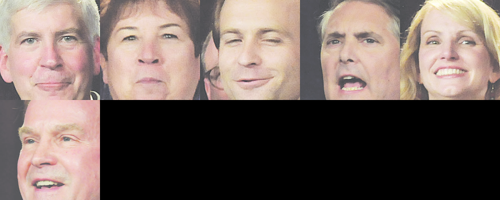

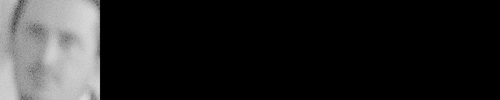

In [9]:
zip_path = "./drive/My Drive/Colab Notebooks/small_img.zip"

def unzip(zpath, new_path): 
  
    '''Unzip files and return list of the files names
     
     param zpath: specify the zip-file name, location on disk
     param new_path: the path to extract the files into.'''

    with ZipFile(zpath) as ziper:

        if not os.path.exists(new_path): 
            os.mkdir(new_path)
            print("created new directory.")

        ziper.extractall(new_path)
        flist =  {"names":ziper.namelist(), "path":new_path}
        print("Extracted files are found in:\n{}".format(new_path))
        
        return flist  
      
      
def word_search (word, zip_path, unzip_path=None):
  
    haar_path = './drive/My Drive/Colab Notebooks/haarcascade_frontalface_default.xml'
    font_style = "./drive/My Drive/Colab Notebooks/Assistant-Regular.otf"

  # ---------------------------------------
    if not unzip_path :
        zipName = os.path.basename(zip_path[:-4])
        unzip_path = "./" + zipName + '/'
    
    flist = unzip(zip_path, unzip_path)
    imgNames, imgs_path = flist['names'], flist['path']


    for imgName in imgNames:


        croper = FaceCrop() 
        finder = FindWord()

        img = croper.import_img(imgs_path+imgName)
        processedImg = croper.img_process(binarize=False, get_edges=False)
        processedTxtImg = croper.img_process(binarize=True, get_edges=True, img_format='pil')

        finder.img_to_text(processedTxtImg)
        state = finder.find_word('Chris')

        if state == True:

            croper.apply_classifier(processedImg, 1.2, 10, haar_path)
            croper.select_faces(show_im=False, size=(500, 500))
            faces = croper.crop_imgs()

            sheet = ContactSheet(faces, imgName, font_style)
            sheet.plot_sheet()

        
def main ():
  
    word_search('Chris', zip_path)
    
    
if __name__ == "__main__":

    main()
